In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!wget -q 'https://bortigno.web.cern.ch/bortigno/machine-learninig/datasets/dash-world-cleaned.txt'
runs = pd.read_csv('dash-world-cleaned.txt', skiprows=[1], delimiter='\t')
runs

,year,time,type,athelete,country
0,2008,9.69,1,Usain Bolt,(JAM)
1,2008,9.72,1,Usain Bolt,(JAM)
2,2007,9.74,1,Asafa Powell,(JAM)
3,2006,9.77,1,Asafa Powell,(JAM)
4,2006,9.77,1,Asafa Powell,(JAM)
5,2006,9.77,1,Justin Gatlin,(USA)
6,2005,9.77,1,Asafa Powell,(JAM)
7,2002,9.78,1,Tim Montgomery,(USA)
8,1999,9.79,1,Maurice Greene,(USA)
9,1996,9.84,1,Donovan Bailey,(CAN)


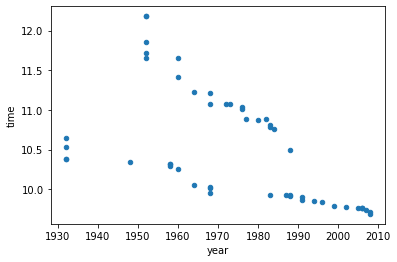

In [ ]:
runs.plot.scatter(x='year', y='time')

In [ ]:
runs[runs.type==1]['time']

0      9.69
1      9.72
2      9.74
3      9.77
4      9.77
5      9.77
6      9.77
7      9.78
8      9.79
9      9.84
10     9.85
11     9.86
12     9.90
13     9.92
14     9.93
15     9.93
16     9.93
17     9.95
18    10.02
19    10.03
20    10.06
21    10.25
22    10.29
23    10.32
24    10.32
25    10.34
26    10.38
27    10.38
28    10.53
29    10.64
Name: time, dtype: float64

In [ ]:
runs[runs.type==2]['time']

30    10.49
31    10.76
32    10.79
33    10.81
34    10.87
35    10.88
36    10.88
37    11.01
38    11.04
39    11.07
40    11.07
41    11.08
42    11.21
43    11.23
44    11.41
45    11.65
46    11.65
47    11.72
48    11.86
49    12.18
50    12.18
Name: time, dtype: float64

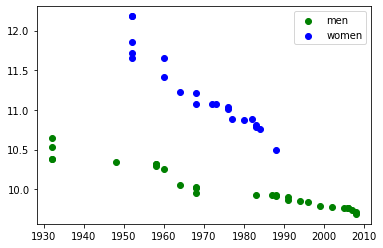

In [ ]:
labels = ['men', 'women']
runs1 = runs[runs.type==1]
runs2 = runs[runs.type==2]
plt.scatter(runs1['year'],runs1['time'],label=labels[0], c='g')
plt.scatter(runs2['year'],runs2['time'],label=labels[1], c='b')
plt.legend()
plt.show()

In [ ]:
#we'll now try to predict when women will be as fast as men
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#men
x_train, x_test, y_train, y_test = train_test_split(runs[runs.type==1]['year'], runs[runs.type==1]['time'],test_size=0.33,random_state=42)

print(runs[runs.type==1]['year'].size)
print(x_train.size)

30
20


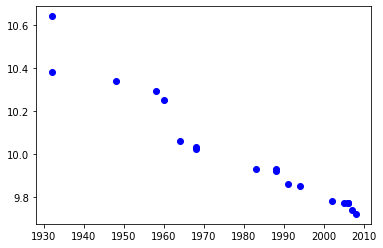

In [ ]:
plt.scatter(x_train, y_train, label='test', c='b')
plt.show()

In [ ]:
lr = LinearRegression().fit(x_train, y_train)

ValueError: ignored

In [ ]:
#correcting the array size
x_train = x_train.array.reshape(-1,1)
x_test = x_test.array.reshape(-1,1)
y_train = y_train.array.reshape(-1,1)
y_test = y_test.array.reshape(-1,1)

lr = LinearRegression().fit(x_train, y_train)

In [ ]:
print('lr.coef_', lr.coef_)
print('lr.intercept_', lr.intercept_)

lr.coef_ [[-0.00996314]]
lr.intercept_ [29.72499202]


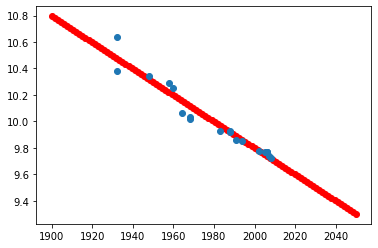

In [ ]:
x = np.linspace(1900,2050,100)
y = lr.coef_ * x + lr.intercept_
plt.scatter(x,y,c='r')
plt.scatter(x_train,y_train)
plt.show()

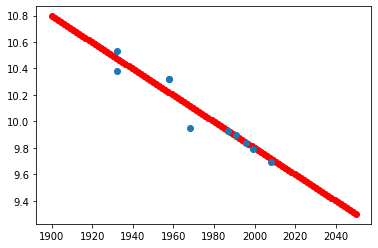

In [ ]:
plt.scatter(x,y,c='r')
plt.scatter(x_test,y_test)
plt.show()

In [ ]:
print('train score', lr.score(x_train,y_train))
print('test score', lr.score(x_test,y_test))

train score 0.9397844748628977
test score 0.9186857774960621


In [ ]:
#women
x1_train, x1_test, y1_train, y1_test = train_test_split(runs[runs.type==2]['year'], runs[runs.type==2]['time'],test_size=0.33,random_state=42)
print(runs[runs.type==2]['year'].size)
print(x1_train.size)

21
14


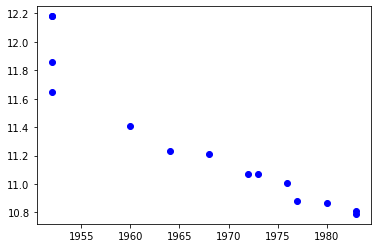

In [ ]:
plt.scatter(x1_train, y1_train, label='test', c='b')
plt.show()

In [ ]:
x1_train = x1_train.array.reshape(-1,1)
x1_test = x1_test.array.reshape(-1,1)
y1_train = y1_train.array.reshape(-1,1)
y1_test = y1_test.array.reshape(-1,1)

lr = LinearRegression().fit(x1_train, y1_train)

In [ ]:
print('lr.coef_', lr.coef_)
print('lr.intercept_', lr.intercept_)

lr.coef_ [[-0.03811721]]
lr.intercept_ [86.29431438]


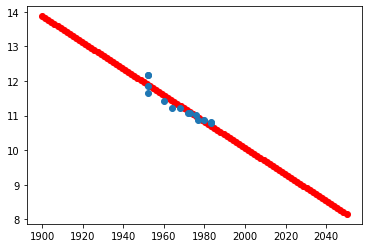

In [ ]:
x1 = np.linspace(1900,2050,100)
y1 = lr.coef_ * x1 + lr.intercept_
plt.scatter(x1,y1,c='r')
plt.scatter(x1_train,y1_train)
plt.show()

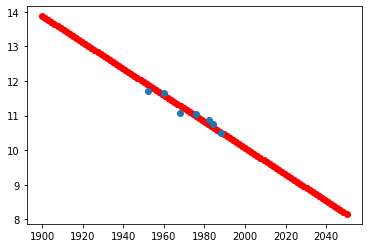

In [ ]:
plt.scatter(x1,y1,c='r')
plt.scatter(x1_test,y1_test)
plt.show()

In [ ]:
print('train score', lr.score(x1_train,y1_train))
print('test score', lr.score(x1_test,y1_test))

train score 0.8919735662863517
test score 0.9151937094600051


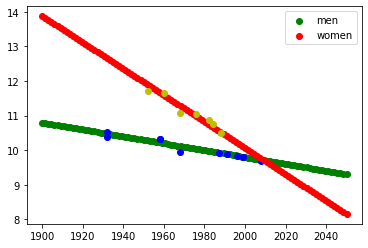

In [ ]:
plt.scatter(x,y,c='g',label='men')
plt.scatter(x_test,y_test,c='b')
plt.scatter(x1,y1,c='r',label='women')
plt.scatter(x1_test,y1_test,c='y')
plt.legend()
plt.show()

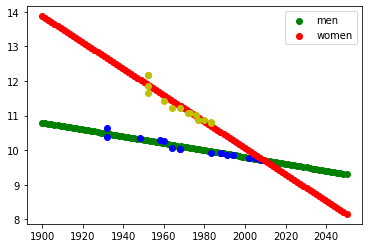

In [ ]:
plt.scatter(x,y,c='g',label='men')
plt.scatter(x_train,y_train,c='b')
plt.scatter(x1,y1,c='r',label='women')
plt.scatter(x1_train,y1_train,c='y')
plt.legend()
plt.show()

I limiti di questo metodo sono:
1) diamo per scontato che la regressione sia lineare 
2) ridotto numero di dati perchè il modello sia attendibile
3) non c'è il calcolo dell'errore associato alla regressione lineare